In [1]:
#%%pycodestyle
# Load package to confirm the code is PEP-8 formmat
#pip install pycodestyle
#pip install pycodestyle_magic
%load_ext pycodestyle_magic
# Load libraries
import pandas as pd
import numpy as np
import re
# Checking
# pd
# np

In [43]:
# Set display to see data.
pd.set_option('display.width', 4000)
pd.set_option('max_colwidth', 4000)
pd.set_option('max_rows', 100)
pd.set_option('max_columns', 200)

In [2]:
#%%pycodestyle
# Load dataframe
df = pd.read_csv("./DOT_teste_data_science.csv", encoding='ISO-8859-1')

In [3]:
#%%pycodestyle
# Change Column names
df.columns = ['Id', 'PlaceTest', 'DateTest',
              'Rate', 'TextRate', 'HourTest',
              'Sex', 'MaritalStatus', 'Education',
              'Hometown', 'Neighborhood']

# Create new dataframe with the changes and preserve the original
# Drop ID column
df2 = df.drop(['Id'], axis=1)

# Show new dataframe
df2.head()

,PlaceTest,DateTest,Rate,TextRate,HourTest,Sex,MaritalStatus,Education,Hometown,Neighborhood
0,GO - Goiás,13/01/2017,"7,45","2,2",manhã,Masculino,Casado(a),Ensino médio,fortaleza,Asa Sul
1,GO - Goiás,10/01/2017,"7,4","2,4",manhã,Masculino,Casado(a),Especialização,Recife,Norte (Águas Claras)
2,GO - Goiás,07/01/2017,"7,3","1,8",manhã,Masculino,Casado(a),Superior,BRASILIA,Setor Sudoeste
3,GO - Goiás,02/01/2017,"7,2","1,7",Noite,Masculino,Solteiro(a),Ensino médio,Brasília,Setor Norte
4,GO - Goiás,09/01/2017,"6,95","1,7",manhã,Feminino,Solteiro(a),Superior,BRASÍLIA,Guará I


In [4]:
#%%pycodestyle
# Check if there is all values.
df2.isnull().values.any()

True

In [5]:
#%%pycodestyle
# Unique Counts


def isNaN(df):
    for i in df.columns:
        count = df[i].isnull().values.any()
        print(i, ": ", count)


# Check all columns, True = There is NaN, False = There is no Nan.
print(isNaN(df2))

PlaceTest :  False
DateTest :  True
Rate :  False
TextRate :  False
HourTest :  True
Sex :  True
MaritalStatus :  True
Education :  True
Hometown :  True
Neighborhood :  True
None


In [6]:
#%%pycodestyle
print('dtypes: ')
df2.dtypes

dtypes: 


PlaceTest        object
DateTest         object
Rate             object
TextRate         object
HourTest         object
Sex              object
MaritalStatus    object
Education        object
Hometown         object
Neighborhood     object
dtype: object

In [7]:
# Change comma to point.
df2.Rate.replace(",", ".", regex=True, inplace=True)
df2.TextRate.replace(",", ".", regex=True, inplace=True)
# Transform Rate and TextRate to float.
df2[["Rate", "TextRate"]] = df2[["Rate", "TextRate"]].apply(pd.to_numeric)

In [8]:
# Create new column to identify if this student has been approved, or not.
conditions = [(df2['Rate'] >= 5.0) & (df2['TextRate'] > 0.0)]
choices = [1]

df2['Approved'] = np.select(conditions, choices, default=0)


In [9]:
df2.head()

,PlaceTest,DateTest,Rate,TextRate,HourTest,Sex,MaritalStatus,Education,Hometown,Neighborhood,Approved
0,GO - Goiás,13/01/2017,7.45,2.2,manhã,Masculino,Casado(a),Ensino médio,fortaleza,Asa Sul,1
1,GO - Goiás,10/01/2017,7.40,2.4,manhã,Masculino,Casado(a),Especialização,Recife,Norte (Águas Claras),1
2,GO - Goiás,07/01/2017,7.30,1.8,manhã,Masculino,Casado(a),Superior,BRASILIA,Setor Sudoeste,1
3,GO - Goiás,02/01/2017,7.20,1.7,Noite,Masculino,Solteiro(a),Ensino médio,Brasília,Setor Norte,1
4,GO - Goiás,09/01/2017,6.95,1.7,manhã,Feminino,Solteiro(a),Superior,BRASÍLIA,Guará I,1


In [10]:
#%%pycodestyle
print('dtypes: ')
df2.dtypes

dtypes: 


PlaceTest         object
DateTest          object
Rate             float64
TextRate         float64
HourTest          object
Sex               object
MaritalStatus     object
Education         object
Hometown          object
Neighborhood      object
Approved           int64
dtype: object

In [11]:
#%%pycodestyle
print('Decribe: ')
df2.describe()

Decribe: 


,Rate,TextRate,Approved
count,12100.000000,12100.000000,12100.000000
mean,4.577988,0.874373,0.481570
std,1.704218,0.855287,0.499681
min,0.750000,0.000000,0.000000
25%,3.000000,0.000000,0.000000
50%,4.850000,1.100000,0.000000
75%,5.950000,1.700000,1.000000
max,10.000000,2.500000,1.000000


In [12]:
#%%pycodestyle
print('Info: ')
df2.info()

Info: 
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12100 entries, 0 to 12099
Data columns (total 11 columns):
PlaceTest        12100 non-null object
DateTest         12060 non-null object
Rate             12100 non-null float64
TextRate         12100 non-null float64
HourTest         12060 non-null object
Sex              12060 non-null object
MaritalStatus    12060 non-null object
Education        12060 non-null object
Hometown         12060 non-null object
Neighborhood     12060 non-null object
Approved         12100 non-null int64
dtypes: float64(2), int64(1), object(8)
memory usage: 1.0+ MB


In [13]:
#%%pycodestyle
# Unique Counts


def unique_counts(df):
    for i in df.columns:
        count = df[i].nunique()
        print(i, ": ", count)


print(unique_counts(df2))

PlaceTest :  21
DateTest :  34
Rate :  123
TextRate :  26
HourTest :  2
Sex :  2
MaritalStatus :  6
Education :  10
Hometown :  4602
Neighborhood :  4426
Approved :  2
None


In [14]:
#%%pycodestyle
print('Sex: ', df.Sex.unique())
print('HourTest: ', df.HourTest.unique())
print('MaritalStatus: ', df.MaritalStatus.unique())
print('Education: ', df.Education.unique())
print('PlaceTest: ', df.PlaceTest.unique())

Sex:  ['Masculino' 'Feminino' nan]
HourTest:  ['manhã' 'Noite' nan]
MaritalStatus:  ['Casado(a)' 'Solteiro(a)' 'Divorciado(a)' 'Separado(a)' 'Viúvo(a)' nan
 '0']
Education:  ['Ensino médio' 'Especialização' 'Superior' 'Superior incompleto'
 'Mestrado' 'MBA' 'Nível técnico' 'Ensino fundamental' nan 'Doutorado'
 'Não informado']
PlaceTest:  ['GO - Goiás' 'MG - Minas Gerais' 'MS - Mato Grosso do Sul' 'PA - Pará'
 'PB - Paraíba' 'RJ - Rio de Janeiro' 'SC - Santa Catarina' 'SE - Sergipe'
 'CE - Ceará' 'PI - Piauí' 'RN - Rio Grande do Norte' 'BA - Bahia'
 'RS - Rio Grande do Sul' 'RO - Rondônia' 'MT - Mato Grosso'
 'PE - Pernambuco' 'RR - Roraima' 'MA - Maranhão' 'ES - Espírito Santo'
 'TO - Tocantins' 'AM - Amazonas']


In [15]:
#%%pycodestyle
# Change Sex from text to integer: 0 - NaN, 1-Male, 2-Female.
conditions = [(df2['Sex'] == 'Masculino'),
              (df2['Sex'] == 'Feminino')]
choices = [1, 2]

df2['Sex'] = np.select(conditions, choices, default=0)

In [16]:
df2.groupby('Sex').apply(lambda df2: df2.sample(1))

,,PlaceTest,DateTest,Rate,TextRate,HourTest,Sex,MaritalStatus,Education,Hometown,Neighborhood,Approved
Sex,,,,,,,,,,,,
0,6683,GO - Goiás,NaN,2.75,0.0,NaN,0,NaN,NaN,NaN,NaN,0
1,9724,MA - Maranhão,06/08/2016,7.80,2.3,manhã,1,Solteiro(a),Superior incompleto,Imperatriz,Vila Vitória,1
2,6261,RO - Rondônia,09/01/2017,2.50,0.0,Noite,2,Solteiro(a),Ensino médio,Guajará mirim,Rural,0


In [17]:
#%%pycodestyle
# Change HourTest from text to integer: 0 - NaN, 1-Morning, 2-Evening
conditions = [(df2['HourTest'] == 'manhã'),
              (df2['HourTest'] == 'Noite')]
choices = [1, 2]

df2['HourTest'] = np.select(conditions, choices, default=0)

In [18]:
df2.groupby('HourTest').apply(lambda df2: df2.sample(1))

,,PlaceTest,DateTest,Rate,TextRate,HourTest,Sex,MaritalStatus,Education,Hometown,Neighborhood,Approved
HourTest,,,,,,,,,,,,
0,6781,MA - Maranhão,NaN,3.5,0.0,0,0,NaN,NaN,NaN,NaN,0
1,7125,MG - Minas Gerais,31/07/2016,6.0,1.5,1,2,Casado(a),Ensino médio,Entre Rios de Minas,Zona Rural,1
2,5342,BA - Bahia,17/01/2017,3.0,0.0,2,1,Solteiro(a),Ensino médio,Piraì do Norte,zona rural,0


In [19]:
#%%pycodestyle
# Change MaritalStatus from text to integer: 0 - NaN or 0,
# 1-Married, 2-Divorced, 3-Separated, 4-Single, 5-Widow
conditions = [(df2['MaritalStatus'] == 'Casado(a)'),
              (df2['MaritalStatus'] == 'Divorciado(a)'),
              (df2['MaritalStatus'] == 'Separado(a)'),
              (df2['MaritalStatus'] == 'Solteiro(a)'),
              (df2['MaritalStatus'] == 'Viúvo(a)')]
choices = [1, 2, 3, 4, 5]

df2['MaritalStatus'] = np.select(conditions, choices, default=0)

In [20]:
df2.groupby('MaritalStatus').apply(lambda df2: df2.sample(1))

,,PlaceTest,DateTest,Rate,TextRate,HourTest,Sex,MaritalStatus,Education,Hometown,Neighborhood,Approved
MaritalStatus,,,,,,,,,,,,
0,377,PA - Pará,NaN,6.00,1.5,0,0,0,NaN,NaN,NaN,1
1,11351,RR - Roraima,08/08/2016,3.25,0.0,1,2,1,Ensino médio,Alto Alegre,Centro,0
2,557,RJ - Rio de Janeiro,10/01/2017,5.95,1.2,1,2,2,Ensino médio,Barra mansa,CENTRO,1
3,6610,GO - Goiás,14/01/2017,3.25,0.0,2,1,3,Ensino médio,São Francisco de Goiás,Setor Central,0
4,8654,PA - Pará,04/08/2016,4.80,0.3,2,1,4,Ensino médio,Alto Alegre do Pindaré,Resende 2,0
5,10492,PB - Paraíba,01/08/2016,2.25,0.0,1,1,5,Ensino médio,ALAGOA GRANDE,ZONA RURAL,0


In [21]:
#%%pycodestyle
# Change Education from text to integer: 0 - NaN or 0,
# 1-Married, 2-Divorced, 3-Separated, 4-Single, 5-Widow
conditions = [(df2['Education'] == 'Doutorado'),
              (df2['Education'] == 'Ensino fundamental'),
              (df2['Education'] == 'Ensino médio'),
              (df2['Education'] == 'Especialização'),
              (df2['Education'] == 'MBA'),
              (df2['Education'] == 'Mestrado'),
              (df2['Education'] == 'Nível técnico'),
              (df2['Education'] == 'Superior'),
              (df2['Education'] == 'Superior incompleto')]
choices = [1, 2, 3, 4, 5, 6, 7, 8, 9]

df2['Education'] = np.select(conditions, choices, default=0)

In [22]:
df2.groupby('Education').apply(lambda df2: df2.sample(1))

,,PlaceTest,DateTest,Rate,TextRate,HourTest,Sex,MaritalStatus,Education,Hometown,Neighborhood,Approved
Education,,,,,,,,,,,,
0,6694,GO - Goiás,NaN,2.75,0.0,0,0,0,0,NaN,NaN,0
1,2000,ES - Espírito Santo,17/01/2017,6.80,1.8,2,1,1,1,Linhares-ES,Colina de Laranjeiras,1
2,6959,GO - Goiás,30/07/2016,6.70,1.7,2,1,1,2,silvania goias,FAZENDA BOM JARDIM,1
3,5488,MT - Mato Grosso,13/01/2017,2.50,0.0,2,1,4,3,sorriso,São Jose,0
4,7773,SC - Santa Catarina,13/08/2016,7.70,2.2,2,1,4,4,SÃO JOAQUIM,Centro,1
5,1646,MT - Mato Grosso,13/01/2017,6.45,2.2,2,2,4,5,Quedas do Iguaçu,Jardim Olenka,1
6,2061,GO - Goiás,16/01/2017,6.70,1.7,2,1,4,6,goiânia,Setor Leste Universitário,1
7,2021,ES - Espírito Santo,03/01/2017,5.70,1.7,2,2,2,7,Linhares,Praia Grande,1
8,6566,GO - Goiás,07/01/2017,3.50,0.0,1,2,4,8,PLANALTINA,Vila Brasília,0


In [24]:
#%%pycodestyle
# Change Placetest from text to integer: 0 - NaN,
# 1-MG - Minas Gerais
# 2-MS - Mato Grosso do Sul
# 3-PA - Pará
# 4-PB - Paraíba
# 5-RJ - Rio de Janeiro
# 6-SC - Santa Catarina
# 7-SE - Sergipe
# 8-CE - Ceará
# 9-PI - Piauí
# 10-RN - Rio Grande do Norte
# 11-BA - Bahia
# 12-RS - Rio Grande do Sul
# 13-RO - Rondônia
# 14-MT - Mato Grosso
# 15-PE - Pernambuco
# 16-RR - Roraima
# 17-MA - Maranhão
# 18-ES - Espírito Santo
# 19-TO - Tocantins
# 20-AM - Amazonas
# 21-GO - Goiás
conditions = [(df2['PlaceTest'] == 'MG - Minas Gerais'),
              (df2['PlaceTest'] == 'MS - Mato Grosso do Sul'),
              (df2['PlaceTest'] == 'PA - Pará'),
              (df2['PlaceTest'] == 'PB - Paraíba'),
              (df2['PlaceTest'] == 'RJ - Rio de Janeiro'),
              (df2['PlaceTest'] == 'SC - Santa Catarina'),
              (df2['PlaceTest'] == 'SE - Sergipe'),
              (df2['PlaceTest'] == 'CE - Ceará'),
              (df2['PlaceTest'] == 'PI - Piauí'),
              (df2['PlaceTest'] == 'RN - Rio Grande do Norte'),
              (df2['PlaceTest'] == 'BA - Bahia'),
              (df2['PlaceTest'] == 'RS - Rio Grande do Sul'),
              (df2['PlaceTest'] == 'RO - Rondônia'),
              (df2['PlaceTest'] == 'MT - Mato Grosso'),
              (df2['PlaceTest'] == 'PE - Pernambuco'),
              (df2['PlaceTest'] == 'RR - Roraima'),
              (df2['PlaceTest'] == 'MA - Maranhão'),
              (df2['PlaceTest'] == 'ES - Espírito Santo'),
              (df2['PlaceTest'] == 'TO - Tocantins'),
              (df2['PlaceTest'] == 'AM - Amazonas'),
              (df2['PlaceTest'] == 'GO - Goiás'),
              ]
choices = [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14,
           15, 16, 17, 18, 19, 20, 21]

df2['PlaceTest'] = np.select(conditions, choices, default=0)

In [25]:
df2.groupby('PlaceTest').apply(lambda df2: df2.sample(1))

,,PlaceTest,DateTest,Rate,TextRate,HourTest,Sex,MaritalStatus,Education,Hometown,Neighborhood,Approved
PlaceTest,,,,,,,,,,,,
1,4041,1,08/01/2017,3.25,0.0,2,2,4,3,Manhuaçu,bom jardim,0
2,8122,2,28/07/2016,7.60,1.6,2,1,4,3,Coxim-ms,Vila bela,1
3,10950,3,12/08/2016,2.50,0.0,1,2,4,3,Mãe do rio,Nagib Demachki,0
4,3112,4,12/01/2017,5.30,1.8,2,2,4,3,Alagoa Grande,Canafistula,1
5,8739,5,13/08/2016,7.75,1.5,1,1,1,8,RIO DE JANEIRO,Leblon,1
6,6876,6,13/01/2017,4.45,1.2,2,1,1,3,Rio do sul,Itoupava,0
7,4322,7,09/01/2017,4.75,0.0,2,2,1,3,Aracaju,Federação,0
8,9292,8,08/08/2016,7.65,1.9,2,1,4,3,QUIXADA,CUSTODIO,1
9,4164,9,15/01/2017,2.75,0.0,1,2,2,3,bacabal,Beira Rio,0


In [27]:
df2.head()

,PlaceTest,DateTest,Rate,TextRate,HourTest,Sex,MaritalStatus,Education,Hometown,Neighborhood,Approved
0,21,13/01/2017,7.45,2.2,1,1,1,3,fortaleza,Asa Sul,1
1,21,10/01/2017,7.40,2.4,1,1,1,4,Recife,Norte (Águas Claras),1
2,21,07/01/2017,7.30,1.8,1,1,1,8,BRASILIA,Setor Sudoeste,1
3,21,02/01/2017,7.20,1.7,2,1,4,3,Brasília,Setor Norte,1
4,21,09/01/2017,6.95,1.7,1,2,4,8,BRASÍLIA,Guará I,1


In [37]:
df2[['Rate', 'TextRate']].describe()

,Rate,TextRate
count,12100.000000,12100.000000
mean,4.577988,0.874373
std,1.704218,0.855287
min,0.750000,0.000000
25%,3.000000,0.000000
50%,4.850000,1.100000
75%,5.950000,1.700000
max,10.000000,2.500000


In [45]:
pd.crosstab(df2['Approved'], df2['PlaceTest'])


#pd.crosstab(sample['is_booking'], sample['srch_rm_cnt'])
#sample.groupby('srch_rm_cnt')['is_booking'].mean()
#sample['srch_children_cnt'].corr(sample['is_booking'])
#sample.corr()

PlaceTest,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21
Approved,,,,,,,,,,,,,,,,,,,,,
0,467,421,934,261,297,225,169,264,81,147,480,131,244,167,125,457,394,77,128,40,764
1,431,416,622,348,480,320,73,292,60,83,411,280,209,165,84,326,334,49,197,65,582


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7fe231f88518>,
      dtype=object)

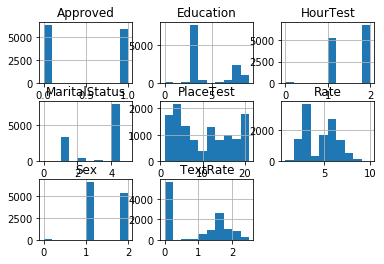

In [51]:
df2[['PlaceTest', 'DateTest', 'Rate', 'TextRate', 'HourTest', 'Sex', 'MaritalStatus', 'Education', 'Hometown', 'Neighborhood', 'Approved']].hist()

In [73]:
df2.groupby('Approved')['MaritalStatus']\
    .agg({'HowMany': 'count'}).reset_index()

/home/oracy/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:1: FutureWarning: using a dict on a Series for aggregation
is deprecated and will be removed in a future version
  """Entry point for launching an IPython kernel.


,Approved,HowMany
0,0,6273
1,1,5827


In [68]:
df2

,PlaceTest,DateTest,Rate,TextRate,HourTest,Sex,MaritalStatus,Education,Hometown,Neighborhood,Approved
0,21,13/01/2017,7.45,2.2,1,1,1,3,fortaleza,Asa Sul,1
1,21,10/01/2017,7.40,2.4,1,1,1,4,Recife,Norte (Águas Claras),1
2,21,07/01/2017,7.30,1.8,1,1,1,8,BRASILIA,Setor Sudoeste,1
3,21,02/01/2017,7.20,1.7,2,1,4,3,Brasília,Setor Norte,1
4,21,09/01/2017,6.95,1.7,1,2,4,8,BRASÍLIA,Guará I,1
5,21,10/01/2017,6.90,2.4,1,2,4,3,ANÁPOLIS,Jardim Europa,1
6,21,10/01/2017,6.90,1.9,1,1,4,3,ALEXÂNIA,SETOR NORTE,1
7,21,10/01/2017,6.75,1.5,1,2,4,8,ENTRE RIOS DE MINAS,Sul (Águas Claras),1
8,21,14/01/2017,6.45,2.2,1,1,4,8,Brasilia,Riacho Fundo II,1
9,21,05/01/2017,6.45,1.7,1,1,4,3,BRASÍLIA,Centro,1
